# Imports e inicialización del DataFrame

In [2]:
!pip install squarify
import pandas as pd
import numpy as np
import seaborn as sns
import squarify # pip install squarify
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

In [4]:
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

#from google.colab import files 
#uploaded = files.upload()


In [5]:
#link = 'https://drive.google.com/file/d/1dOMHOcmTuEUmN6-OwaXzxmwtrSglE4fC/view'
#id = link.split("/")[-2] 
  
#downloaded = drive.CreateFile({'id':id})  
#downloaded.GetContentFile('Entrenamieto_ECI_2020.csv')  

In [6]:
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

entrenamientoDf = pd.read_csv('Entrenamieto_ECI_2020.csv')
entrenamientoDf.head(100)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.59,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,"5,272,800.00",EUR,"5,272,800.00",Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.60,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,"48,230.00",EUR,"48,230.00",Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,"83,865.60",USD,"83,865.60",Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,"7,421,881.50",USD,"7,421,881.50",Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,"13,357,192.50",USD,"13,357,192.50",Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_939,5,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,28,USD,"14,838,277.50",USD,"14,838,277.50",Closed Lost,Prod_Category_A_None
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_1618,6,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,Non

# 1)Análisis del DataFrame


In [7]:
entrenamientoDf.info()
#Las columnas de ASP,ASP_(converted) y Total_Amount tienen elementos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16947 non-null  int64  
 1   Region                              16947 non-null  object 
 2   Territory                           16947 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64  
 7   Submitted_for_Approval              16947 non-null  int64  
 8   Bureaucratic_Code                   16947 non-null  object 
 9   Account_Created_Date                16947 non-null  object 
 10  Source                              16947 non-null  object 
 11  Billing_Country                     16947

Aqui podemos ver que las columnas:
  
1.   ASP
2.   ASP_converted
3.   Total_Amount



In [8]:
entrenamientoDf['Last_Activity'].value_counts()

NaT    16947
Name: Last_Activity, dtype: int64

In [9]:
entrenamientoDf['ASP_(converted)_Currency'].value_counts()

USD    16947
Name: ASP_(converted)_Currency, dtype: int64

In [10]:
entrenamientoDf.groupby(['Product_Name','ASP','TRF']).count()

ID  Region  Territory  \
Product_Name     ASP   TRF                          
Product_Name_0    0.00 0     9       9          9   
Product_Name_1    0.00 0     2       2          2   
Product_Name_10   0.00 0     7       7          7   
Product_Name_100  0.00 0    16      16         16   
                  0.15 0     1       1          1   
...                         ..     ...        ...   
Product_Name_99   0.65 5     1       1          1   
                  0.67 5     1       1          1   
                  1.70 5     1       1          1   
                 68.00 3     1       1          1   
                 78.00 10    1       1          1   

                            Pricing, Delivery_Terms_Quote_Appr  \
Product_Name     ASP   TRF                                       
Product_Name_0    0.00 0                                     9   
Product_Name_1    0.00 0                                     2   
Product_Name_10   0.00 0                                     7   
Product_Name_100  0.00 0                                    16   
                  0.15 0                                     1   
...                                                        ...   
Product_Name_99   0.65 5                                     1   
                  0.67 5                                     1   
                  1.70 5                                     1   
                 68.00 3                                     1   
                 78.00 10                                    1   

                            Pricing, Delivery_Terms_Approved  \
Product_Name     ASP   TRF                                     
Product_Name_0    0.00 0                                   9   
Product_Name_1    0.00 0                                   2   
Product_Name_10   0.00 0                                   7   
Product_Name_100  0.00 0                                  16   
                  0.15 0                                   1   
...                                                      ...   
Product_Name_99   0.65 5                                   1   
                  0.67 5                                   1   
                  1.70 5                                   1   
                 68.00 3                                   1   
                 78.00 10                                  1   

                            Bureaucratic_Code_0_Approval  \
Product_Name     ASP   TRF                                 
Product_Name_0    0.00 0                               9   
Product_Name_1    0.00 0                               2   
Product_Name_10   0.00 0                               7   
Product_Name_100  0.00 0                              16   
                  0.15 0                               1   
...                                                  ...   
Product_Name_99   0.65 5                               1   
                  0.67 5                               1   
                  1.70 5                               1   
                 68.00 3                               1   
                 78.00 10                              1   

                            Bureaucratic_Code_0_Approved  \
Product_Name     ASP   TRF                                 
Product_Name_0    0.00 0                               9   
Product_Name_1    0.00 0                               2   
Product_Name_10   0.00 0                               7   
Product_Name_100  0.00 0                              16   
                  0.15 0                               1   
...                                                  ...   
Product_Name_99   0.65 5                               1   
                  0.67 5                               1   
                  1.70 5                               1   
                 68.00 3                               1   
                 78.00 10                              1   

                            Submitted_for_Approval  Bureaucratic_Code  \
Product_Nam

In [11]:
entrenamientoDf['Actual_Delivery_Date'].value_counts()

NaT    16947
Name: Actual_Delivery_Date, dtype: int64

In [12]:
entrenamientoDf['Product_Name'].value_counts()

Product_Name_100    976
Product_Name_226    836
Product_Name_231    579
Product_Name_491    524
Product_Name_4      474
                   ... 
Product_Name_375      1
Product_Name_509      1
Product_Name_501      1
Product_Name_288      1
Product_Name_350      1
Name: Product_Name, Length: 456, dtype: int64

In [13]:
entrenamientoDf[(entrenamientoDf['ASP_Currency']=='JPY')]['ASP'].value_counts()

 0.00    228
55.00    156
65.00    153
68.00    139
50.00    121
53.00    109
75.00     99
78.00     86
45.00     74
48.00     62
46.00     57
59.00     38
51.00     38
40.00     33
57.00     32
66.00     27
56.00     25
49.00     22
54.00     20
72.00     20
67.00     16
44.00     16
42.00     16
71.00     15
80.00     14
52.00     12
60.00     12
62.00     12
77.00     12
43.00     11
70.00     11
38.00     10
74.00     10
73.00     10
69.00     10
47.00      9
58.00      8
37.00      7
39.00      6
41.00      6
76.00      6
36.00      5
63.00      4
61.00      3
64.00      2
35.00      1
34.00      1
30.00      1
33.00      1
Name: ASP, dtype: int64

In [14]:
entrenamientoDf['Price'].value_counts()

None     15982
Other      609
0.24        27
0.41        22
0.28        20
0.27        18
0.29        17
0.32        15
0.38        14
0.35        14
0.23        13
0.42        12
0.33        12
0.34        11
0.26        11
0.3         11
0.31        10
0.245        8
0.25         7
0.305        7
0.325        6
0.45         6
0.225        6
0.39         6
0.47         6
0.335        6
0.22         6
0.2          5
0.285        4
0.275        4
0.36         4
0.445        4
0.37         4
0.265        3
0.355        3
0.295        3
0.255        3
0.345        2
0.4          2
0.235        2
0.505        2
0.375        2
0.44         2
0.215        2
0.49         2
0.48         2
0.315        2
0.52         2
0.56         2
0.365        1
0.55         1
0.21         1
0.465        1
Name: Price, dtype: int64

In [15]:
entrenamientoDf['Stage']=='Closed_Won'

0        False
1        False
2        False
3        False
4        False
         ...  
16942    False
16943    False
16944    False
16945    False
16946    False
Name: Stage, Length: 16947, dtype: bool

In [16]:
entrenamientoDf.groupby(['Region','Stage']).agg({'ASP':'mean','ASP_(converted)':'mean'}).head()

ASP      ASP_(converted)
Region   Stage                                                  
APAC     Closed Lost                   0.41                 0.39
         Closed Won                    0.39                 0.35
         Proposal                      0.32                 0.32
         Qualification                 0.30                 0.30
Americas Closed Lost                   0.46                 0.46

# A) Análisis columna Total Taxable Amount

Hipótesis: La columna Total_Taxable_Amount es el total de la suma del Total_Amount de cada uno de los items de una oportunidad. 

In [17]:
grouped_by_oportunity_name = entrenamientoDf.groupby(['Opportunity_Name']).agg({'ASP':'count','Total_Amount':'sum','Total_Taxable_Amount': 'max'})

In [18]:
grouped_by_oportunity_name = grouped_by_oportunity_name.rename(columns={'ASP':'items_per_oport','Total_Amount':'Total_Amount_Sum'})

In [19]:
grouped_by_oportunity_name.reset_index()

,Opportunity_Name,items_per_oport,Total_Amount_Sum,Total_Taxable_Amount
0,Opportunity_Name_0,7,"3,494,400.00","3,494,400.00"
1,Opportunity_Name_1,7,"2,193,100.00","2,193,100.00"
2,Opportunity_Name_100,1,"543,780.00","543,780.00"
3,Opportunity_Name_1000,1,"142,142,000.00","142,142,000.00"
4,Opportunity_Name_10000,1,"19,600.00",0.00
...,...,...,...,...
9836,Opportunity_Name_9992,1,"175,190.40",0.00
9837,Opportunity_Name_9995,1,"1,043,490.00","1,043,490.00"
9838,Opportunity_Name_9996,1,"790,246.88","790,246.88"
9839,Opportunity_Name_9997,1,"3,799,810.00","3,799,810.00"


Conclusión: Podemos ver que la columna Total Taxable Amount coincide con la suma del Amount de cada uno de los items de una misma oportunidad de venta.

In [20]:
grouped_by_oportunity_name = grouped_by_oportunity_name.merge(entrenamientoDf[['Stage','Opportunity_Name']],on='Opportunity_Name')

In [21]:
grouped_by_oportunity_name = grouped_by_oportunity_name.drop_duplicates(subset='Opportunity_Name')

In [22]:
#otra forma de obtener lo mismo de arriba.
grouped_by_oportunity_name.merge(entrenamientoDf.Opportunity_Name.drop_duplicates(),on='Opportunity_Name',how="right").nlargest(10,'Total_Amount_Sum')

,Opportunity_Name,items_per_oport,Total_Amount_Sum,Total_Taxable_Amount,Stage
9386,Opportunity_Name_5000,1,"1,320,000,000.00","11,867,301.99",Proposal
3054,Opportunity_Name_5778,1,"919,992,410.00","919,992,410.00",Closed Lost
9107,Opportunity_Name_496,1,"760,000,000.00","760,000,000.00",Proposal
3053,Opportunity_Name_4881,1,"660,005,280.00","660,005,280.00",Closed Lost
9202,Opportunity_Name_4879,1,"660,004,620.00","660,004,620.00",Qualification
3048,Opportunity_Name_5860,1,"523,138,680.00","523,138,680.00",Closed Lost
8977,Opportunity_Name_6236,1,"400,000,000.00","400,000,000.00",Closed Lost
9404,Opportunity_Name_4974,1,"389,880,000.00","389,880,000.00",Proposal
9709,Opportunity_Name_6879,1,"315,000,081.90","315,000,081.90",Closed Lost
9673,Opportunity_Name_3875,1,"256,201,545.60","256,201,545.60",Closed Lost


In [23]:
grouped_by_oportunity_name.nlargest(10, 'Total_Taxable_Amount')

,Opportunity_Name,items_per_oport,Total_Amount_Sum,Total_Taxable_Amount,Stage
12105,Opportunity_Name_6550,1,"12,194,000.00","1,356,338,620.00",Closed Won
10741,Opportunity_Name_5778,1,"919,992,410.00","919,992,410.00",Closed Lost
9540,Opportunity_Name_496,1,"760,000,000.00","760,000,000.00",Proposal
9413,Opportunity_Name_4881,1,"660,005,280.00","660,005,280.00",Closed Lost
9404,Opportunity_Name_4879,1,"660,004,620.00","660,004,620.00",Qualification
10844,Opportunity_Name_5860,1,"523,138,680.00","523,138,680.00",Closed Lost
11744,Opportunity_Name_6236,1,"400,000,000.00","400,000,000.00",Closed Lost
9546,Opportunity_Name_4974,1,"389,880,000.00","389,880,000.00",Proposal
12726,Opportunity_Name_6879,1,"315,000,081.90","315,000,081.90",Closed Lost
7989,Opportunity_Name_3875,1,"256,201,545.60","256,201,545.60",Closed Lost


# B) Analizamos performance de los vendedores.

In [24]:
# Primero filtro y me quedo con las ventas realizadas

df_closed_won = entrenamientoDf[entrenamientoDf['Stage']=='Closed Won']

In [25]:
df_closed_won['Total_Taxable_Amount_USD'] = (df_closed_won['ASP_(converted)'] / df_closed_won['ASP']) * (df_closed_won['Total_Taxable_Amount'])
df_closed_won['Total_Taxable_Amount_Millions_USD'] = df_closed_won['Total_Taxable_Amount_USD'] / 10**6

/home/fernando/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/fernando/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
df_closed_won.nlargest(5, 'Total_Taxable_Amount_USD')

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Total_Taxable_Amount_USD,Total_Taxable_Amount_Millions_USD
2200,27692,Japan,None,1,1,1,1,0,Bureaucratic_Code_4,6/11/2015,Source_3,Japan,Account_Name_1074,Opportunity_Name_6550,1248,116,Person_Name_61,Person_Name_66,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_5,2/19/2016,None,None,None,None,None,None,NaT,3/23/2016,12/4/2016,Person_Name_47,Product_Family_77,Product_Name_100,USD,67.00,USD,67.00,3/1/2016,3/11/2016,2016 - 3,Q1,2016,NaT,0,USD,"12,194,000.00",JPY,"1,356,338,620.00",Closed Won,Prod_Category_A_None,"1,356,338,620.00","1,356.34"
16135,20265,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_1409,Opportunity_Name_844,12390,None,Person_Name_8,Person_Name_8,Account_Type_2,Opportunity_Type_19,Binding,Delivery_Terms_4,12/8/2014,None,None,None,None,None,None,NaT,4/30/2015,8/25/2015,Person_Name_33,Product_Family_164,Product_Name_308,USD,0.69,USD,0.69,4/1/2016,4/30/2016,2016 - 4,Q2,2016,NaT,6,USD,"3,992,215.34",USD,"177,627,662.70",Closed Won,Prod_Category_A_None,"177,627,662.70",177.63
16136,20268,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_1409,Opportunity_Name_844,12390,None,Person_Name_8,Person_Name_8,Account_Type_2,Opportunity_Type_19,Binding,Delivery_Terms_4,12/8/2014,None,None,None,None,None,None,NaT,4/30/2015,8/25/2015,Person_Name_33,Product_Family_158,Product_Name_285,USD,0.69,USD,0.69,4/1/2016,4/30/2016,2016 - 4,Q2,2016,NaT,2,USD,"1,289,309.84",USD,"177,627,662.70",Closed Won,Prod_Category_A_None,"177,627,662.70",177.63
16137,20271,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_1409,Opportunity_Name_844,12390,None,Person_Name_8,Person_Name_8,Account_Type_2,Opportunity_Type_19,Binding,Delivery_Terms_4,12/8/2014,None,None,None,None,None,None,NaT,4/30/2015,8/25/2015,Person_Name_33,Product_Family_164,Product_Name_307,USD,0.69,USD,0.69,3/1/2016,3/31/2016,2016 - 3,Q1,2016,NaT,21,USD,"14,410,505.18",USD,"177,627,662.70",Closed Won,Prod_Category_A_None,"177,627,662.70",177.63
16138,20274,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_1409,Opportunity_Name_844,12390,None,Person_Name_8,Person_Name_8,Account_Type_2,Opportunity_Type_19,Binding,Delivery_Terms_4,12/8/2014,None,None,None,None,None,None,NaT,4/30/2015,8/25/2015,Person_Name_33,Product_Family_158,Product_Name_286,USD,0.69,USD,0.69,3/1/2016,3/31/2016,2016 - 3,Q1,2016,NaT,15,USD,"10,597,690.85",USD,"177,627,662.70",Closed Won,Prod_Category_A_None,"177,627,662.70",177.63


Agrupo por vendedor

In [27]:
total_sells_per_seller = df_closed_won.groupby('Opportunity_Owner').agg({'Total_Taxable_Amount_USD':'sum'})

In [28]:
# Los mejores 5 vendedores en base a la cantidad de dinero ingresado en la empresa por sus ventas

total_sells_per_seller.nlargest(5, 'Total_Taxable_Amount_USD')

,Total_Taxable_Amount_USD
Opportunity_Owner,
Person_Name_8,"4,050,474,355.81"
Person_Name_66,"1,424,166,814.18"
Person_Name_13,"655,147,097.41"
Person_Name_4,"320,394,540.09"
Person_Name_12,"210,630,603.30"


Analizamos el porcentaje de oportunidades cerradas exitosamente por cada vendedor.

In [29]:
df_sellers = entrenamientoDf[['Stage','Opportunity_Owner','Opportunity_Name']]

In [30]:
# Cada oportunidad puede tener asociadas varios registros. Nos quedamos unicamente con un registro por oportunidad.
# Tomamos como hipótesis que una oportunidad tiene asociada un único vendedor

df_sellers = df_sellers.drop_duplicates(subset='Opportunity_Name')

In [31]:
# Calculamos el promedio de cada Stage para cada vendedor

stages = df_sellers.groupby('Opportunity_Owner')["Stage"]
stages = stages.value_counts() / stages.count()
stages = stages.to_frame().unstack().fillna(0)
stages.columns = ['prom_lost','prom_won','prom_proposal','prom_qualification','prom_negotiation']
stages.nlargest(5,'prom_won')

,prom_lost,prom_won,prom_proposal,prom_qualification,prom_negotiation
Opportunity_Owner,,,,,
Person_Name_30,0.00,1.00,0.00,0.00,0.00
Person_Name_19,0.03,0.97,0.00,0.00,0.00
Person_Name_40,0.12,0.88,0.00,0.00,0.00
Person_Name_52,0.22,0.78,0.00,0.00,0.00
Person_Name_32,0.23,0.77,0.00,0.00,0.00


Podemos ver que estos resultados pueden no estar siendo representativos debido al problema relacionado con *La ecuación más peligrosa de la historia*. 

Para solucionarlo, filtramos el data frame y nos quedamos únicamente con los vendedores que tengan más de x oportunidades asociadas, dónde x vamos a tomarlo como el promedio de oportunidades por vendedor.

In [32]:
promedio_opor_vendedor = df_sellers.groupby('Opportunity_Owner')['Stage'].count().mean()
promedio_opor_vendedor

185.67924528301887

In [33]:
# Repetimos mismos cálculos de antes, pero quedandonos únicamente con los vendedores
# que tengan asociados más de 185 oportunidades.

df_sellers['cant_oport'] = df_sellers.groupby('Opportunity_Owner')['Stage'].transform('count')

In [34]:
df_sellers

,Stage,Opportunity_Owner,Opportunity_Name,cant_oport
0,Closed Lost,Person_Name_18,Opportunity_Name_12598,682
1,Closed Won,Person_Name_20,Opportunity_Name_12600,42
2,Closed Won,Person_Name_8,Opportunity_Name_469,763
3,Closed Lost,Person_Name_8,Opportunity_Name_415,763
4,Closed Lost,Person_Name_8,Opportunity_Name_851,763
...,...,...,...,...
16939,Closed Won,Person_Name_13,Opportunity_Name_7202,757
16940,Closed Lost,Person_Name_13,Opportunity_Name_11979,757
16942,Closed Won,Person_Name_13,Opportunity_Name_9245,757
16945,Closed Lost,Person_Name_3,Opportunity_Name_5843,578


In [35]:
df_sellers_filtrado = df_sellers.loc[df_sellers['cant_oport'] >= promedio_opor_vendedor]

In [36]:
df_sellers_filtrado

,Stage,Opportunity_Owner,Opportunity_Name,cant_oport
0,Closed Lost,Person_Name_18,Opportunity_Name_12598,682
2,Closed Won,Person_Name_8,Opportunity_Name_469,763
3,Closed Lost,Person_Name_8,Opportunity_Name_415,763
4,Closed Lost,Person_Name_8,Opportunity_Name_851,763
5,Closed Lost,Person_Name_8,Opportunity_Name_939,763
...,...,...,...,...
16939,Closed Won,Person_Name_13,Opportunity_Name_7202,757
16940,Closed Lost,Person_Name_13,Opportunity_Name_11979,757
16942,Closed Won,Person_Name_13,Opportunity_Name_9245,757
16945,Closed Lost,Person_Name_3,Opportunity_Name_5843,578


In [37]:
stages = df_sellers_filtrado.groupby('Opportunity_Owner')["Stage"]
stages = stages.value_counts() / stages.count()
stages = stages.to_frame().unstack().fillna(0)
stages.columns = ['prom_lost','prom_won','prom_proposal','prom_qualification','prom_negotiation']
stages.nlargest(5,'prom_won')

,prom_lost,prom_won,prom_proposal,prom_qualification,prom_negotiation
Opportunity_Owner,,,,,
Person_Name_19,0.03,0.97,0.00,0.00,0.00
Person_Name_32,0.23,0.77,0.00,0.00,0.00
Person_Name_64,0.31,0.67,0.01,0.00,0.00
Person_Name_66,0.33,0.65,0.00,0.02,0.00
Person_Name_50,0.37,0.62,0.00,0.00,0.01


Conclusión: Podemos ver que el resultado cambio, pero consideramos a estos últimos más representativos ya que no estamos teniendo en cuenta a los vendedores con pocos registros asociados.

# C) Analizamos regiones más calientes en cuanto a ingresos monetarios.

Chequeamos que todos los registros con Stage Closed_Won tengan un Average Selling Price


In [38]:
dfAux = df_closed_won['ASP']=='nan'
dfAux.value_counts()

/home/fernando/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


False    9533
Name: ASP, dtype: int64

Convertimos la columna de Total_Taxable_Amount a una misma moneda, en este caso el dólar.

**Analizar casos especiales en los que no podemos realizar la conversión de JPY a USD**

In [39]:
dfAux = df_closed_won[(df_closed_won['Total_Taxable_Amount_Currency']=='JPY') & (df_closed_won['ASP_Currency']=='USD')]
dfAux

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Total_Taxable_Amount_USD,Total_Taxable_Amount_Millions_USD
2200,27692,Japan,None,1,1,1,1,0,Bureaucratic_Code_4,6/11/2015,Source_3,Japan,Account_Name_1074,Opportunity_Name_6550,1248,116,Person_Name_61,Person_Name_66,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_5,2/19/2016,None,None,None,None,None,None,NaT,3/23/2016,12/4/2016,Person_Name_47,Product_Family_77,Product_Name_100,USD,67.00,USD,67.00,3/1/2016,3/11/2016,2016 - 3,Q1,2016,NaT,0,USD,"12,194,000.00",JPY,"1,356,338,620.00",Closed Won,Prod_Category_A_None,"1,356,338,620.00","1,356.34"
4805,21902,Japan,None,1,1,1,1,0,Bureaucratic_Code_4,9/23/2013,Source_13,Japan,Account_Name_1991,Opportunity_Name_7751,2849,872,Person_Name_32,Person_Name_50,Account_Type_0,Opportunity_Type_7,Non Binding,Delivery_Terms_4,10/24/2016,None,None,None,None,None,None,NaT,10/24/2016,12/4/2016,Person_Name_47,Product_Family_77,Product_Name_100,USD,0.49,USD,0.49,10/25/2016,10/25/2016,2016 - 10,Q4,2016,NaT,0,USD,"4,968.60",JPY,"552,657.00",Closed Won,Prod_Category_A_None,"552,657.00",0.55


Nos quedamos con las columnas que nos interesan para el análisis que queremos hacer.

In [40]:
closedWonShorted = df_closed_won[['Total_Taxable_Amount_USD','Region','Opportunity_Name']]

In [41]:
closedWonShorted.head(10)

,Total_Taxable_Amount_USD,Region,Opportunity_Name
1,"54,552.68",EMEA,Opportunity_Name_12600
2,"83,865.60",Americas,Opportunity_Name_469
7,"50,688.00",Americas,Opportunity_Name_8227
23,"1,621,851.00",APAC,Opportunity_Name_7036
63,"116,898.60",EMEA,Opportunity_Name_4062
64,"3,184,974.00",Americas,Opportunity_Name_6397
65,"2,187.90",Japan,Opportunity_Name_5583
66,"242,619.00",EMEA,Opportunity_Name_2804
67,"242,619.00",EMEA,Opportunity_Name_2801
70,"475,906.50",EMEA,Opportunity_Name_12137


Nos quedamos únicamente con un registro por oportunidad.

In [42]:
closedWonNoDuplicates = closedWonShorted.drop_duplicates(subset='Opportunity_Name')

In [43]:
closedWonNoDuplicates.head()

,Total_Taxable_Amount_USD,Region,Opportunity_Name
1,"54,552.68",EMEA,Opportunity_Name_12600
2,"83,865.60",Americas,Opportunity_Name_469
7,"50,688.00",Americas,Opportunity_Name_8227
23,"1,621,851.00",APAC,Opportunity_Name_7036
63,"116,898.60",EMEA,Opportunity_Name_4062


Agrupamos por región, y sumamos el monto a cobrar.

In [44]:
closedWonGroupedRegion = closedWonNoDuplicates.groupby('Region').agg({'Total_Taxable_Amount_USD':'sum'})
closedWonGroupedRegion = closedWonGroupedRegion.reset_index()
closedWonGroupedRegion

,Region,Total_Taxable_Amount_USD
0,APAC,"200,207,326.37"
1,Americas,"748,257,485.60"
2,EMEA,"582,033,427.75"
3,Japan,"1,457,183,117.16"
4,Middle East,"4,750,701.94"


Text(0.5, 1.0, 'asd')

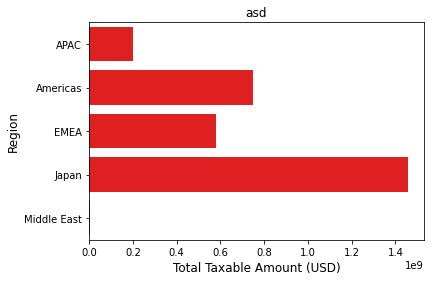

In [45]:
closedWonPlot = sns.barplot(y=closedWonGroupedRegion.Region, x=closedWonGroupedRegion.Total_Taxable_Amount_USD, orient='h', color='r')
closedWonPlot.set_title("Titulo", fontsize=15)
closedWonPlot.set_ylabel("Region", fontsize=12)
closedWonPlot.set_xlabel("Total Taxable Amount (USD)", fontsize=12)
closedWonPlot.set_title("asd", fontsize=12)


# D) ANALISIS DE PORCENTAJE EXITO REGIONES

Una renglón representa un item de la oportunidad. Hay que eliminar los duplicados por oportunidad para no tomar en cuenta dos veces el estado de la misma oportunidad. 

/home/fernando/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Cantidad de oportunidades,Casos ganados,Porcentaje casos ganados
Region,,,
APAC,2086,1155,0.55
Americas,2459,1094,0.44
EMEA,3241,1500,0.46
Japan,1906,1290,0.68
Middle East,149,33,0.22


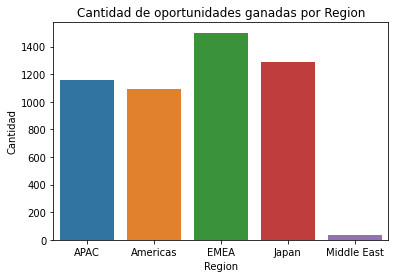

In [48]:
# Pregunta: Cual es la relacion entre la cantidad de casos con casos cerrados de manera exitosa por region ?
auxiliar_df = entrenamientoDf

#Eliminamos los Opportunity_Name duplicados para tener la cantidad neta de oportunidades
auxiliar_df = auxiliar_df.drop_duplicates(subset='Opportunity_Name')

# Nos guardamos en la columna Stage_Won los casos terminados en Closed Won

# ROMPE!!!! Comente tu linea y puse un posible arreglo,fijate si era lo que buscabas
#auxiliar_df["Stage_Won"] = auxiliar_df[auxiliar_df["Stage"] == "Closed Won"]
auxiliar_df["Stage_Won"] = auxiliar_df["Stage"] == "Closed Won"

# Agrupo segun region y sus cantidades de Stages y Stages_Won
#casos_segun_region = auxiliar_df.groupby(["Region"]).agg({"Stage": "count", "Stage_Won" : "count"})
casos_ganados_segun_region = auxiliar_df.groupby(["Region"]).agg({"Stage_Won" : ["count",'sum','mean']})
casos_ganados_segun_region.columns = ['Cantidad de oportunidades','Casos ganados','Porcentaje casos ganados']

# Creo un Barplot
grafico_ganados_segun_region = sns.barplot(x=casos_ganados_segun_region.index,y=casos_ganados_segun_region['Casos ganados'])

# Pongo titulo al grafico
#grafico_exito_segun_region.set_title("Relacion entre cantidad Oportunidades y Oportunidades exitosas por Region")
grafico_ganados_segun_region.set_title("Cantidad de oportunidades ganadas por Region")
# Pongo nombre al label x
#grafico_exito_segun_region.set_xlabel("Region")
grafico_ganados_segun_region.set_xlabel("Region")
#Pongo nombre al label y
#grafico_exito_segun_region.set_ylabel("Number of Oportunities")
grafico_ganados_segun_region.set_ylabel("Cantidad")

grafico_ganados_segun_region
casos_ganados_segun_region


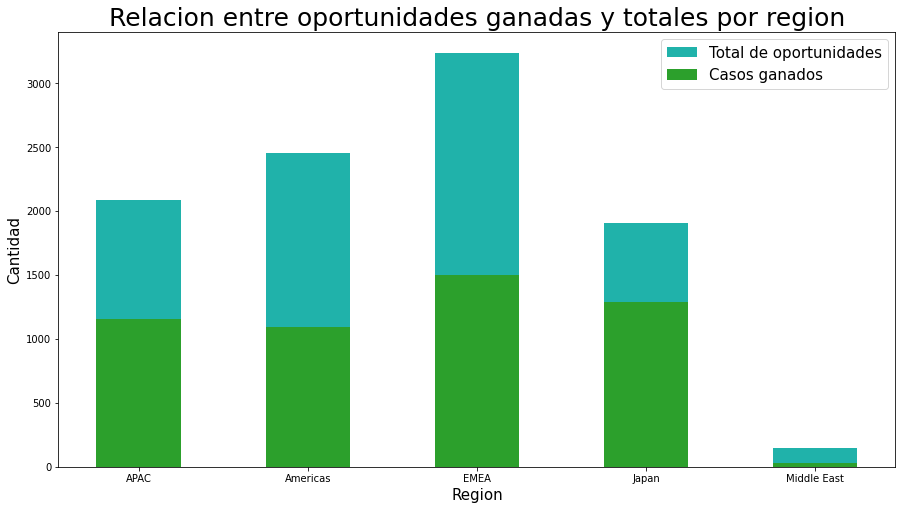

In [49]:
#Grafico mejorado
plt.figure(figsize=(15,8))

x = casos_ganados_segun_region.index
y = casos_ganados_segun_region['Casos ganados']
z = casos_ganados_segun_region['Cantidad de oportunidades']

relacion_totales_ganadas_plot = plt.subplot(111)
relacion_totales_ganadas_plot.bar(x, z, width=0.5, color='lightseagreen', align='center')
relacion_totales_ganadas_plot.bar(x, y, width=0.5, color='tab:green', align='center')

relacion_totales_ganadas_plot.set_title('Relacion entre oportunidades ganadas y totales por region',fontsize=25)
relacion_totales_ganadas_plot.set_xlabel("Region",fontsize=15)
relacion_totales_ganadas_plot.set_ylabel("Cantidad",fontsize=15)
relacion_totales_ganadas_plot.legend(['Total de oportunidades','Casos ganados'],fontsize=15)

plt.show()

# E) Analisis de porcentaje de exito segun si necesita o no codigo burocratico

In [ ]:
#auxiliar = entrenamientoDf
#auxiliar["Necesita_Codigo"] = auxiliar[auxiliar["Bureaucratic_Code_0_Approval"] == 1]
#auxiliar["No_Necesita_Codigo"] = auxiliar[auxiliar["Bureaucratic_Code_0_Approval"] == 0]
#exito_segun_necesidad_codigo = auxiliar.groupby(["Stage"]).agg({"Necesita_Codigo" : "count","No_Necesita_Codigo" : "count" })
#exito = exito_segun_necesidad_codigo.drop(['Negotiation', 'Proposal',"Qualification"])
#exito.plot(kind="pie", subplots= True)

# F) Análisis de las ventas por tipo de producto

In [ ]:
productType = entrenamientoDf['Product_Type']
productType.value_counts()

No se puede hacer un análisis muy interesante de esta columna debido a la cantidad de valores en none que contiene.

# G) Análisis de las ventas por producto

In [ ]:
productos = entrenamientoDf['Product_Name'].value_counts()

In [ ]:
# Obtengo los 10 productos con mayor cantidad de registros.
productos.nlargest(10)

In [ ]:
cantidadProductos = productos.size

In [ ]:
cantidadProductos

In [ ]:
# Me quedo con un df mas chico para el análisis que necesito
ventasPorProd = df_closed_won.loc[:, ('Product_Name','Stage','Total_Taxable_Amount_Millions_USD')]
ventasPorProd

In [ ]:
ventasPorProdGrouped = ventasPorProd.groupby('Product_Name').agg({'Total_Taxable_Amount_Millions_USD':'sum'})

In [ ]:
los10ProdMasVendidos = ventasPorProdGrouped.nlargest(10, 'Total_Taxable_Amount_Millions_USD')

In [ ]:
los10ProdMasVendidos.reset_index(inplace=True)

In [ ]:
plt.figure(figsize=(20,8))
los10ProdMasVendidosPlot = sns.barplot(y='Product_Name', \
                                       x='Total_Taxable_Amount_Millions_USD', \
                                       orient='h', \
                                       data=los10ProdMasVendidos)
los10ProdMasVendidosPlot.set_title("Los mas vendidos",fontsize=30)
los10ProdMasVendidosPlot.set_xlabel("Total Ventas en Millones USD",fontsize=20)
los10ProdMasVendidosPlot.set_ylabel("Producto",fontsize=20)
los10ProdMasVendidosPlot.tick_params(labelsize=15)
los10ProdMasVendidosPlot